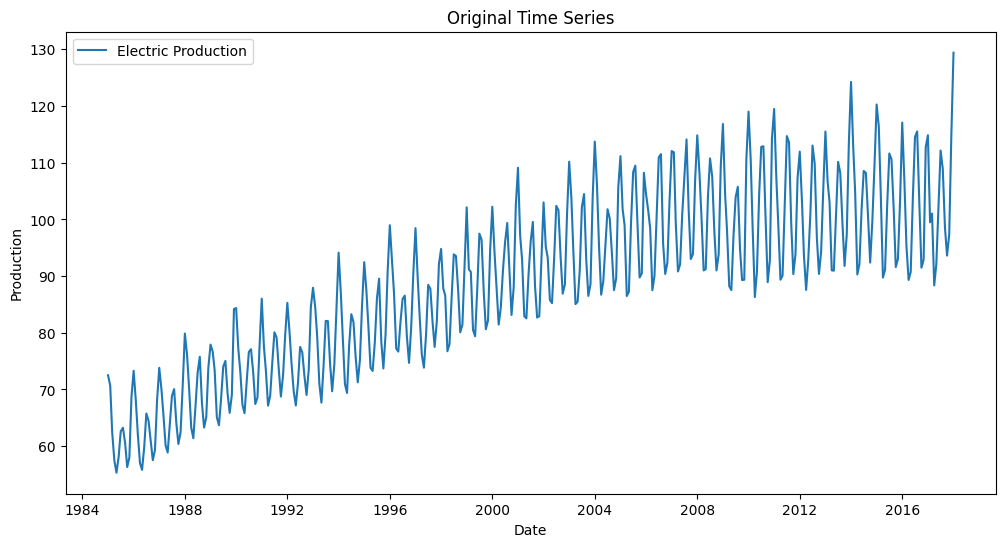

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


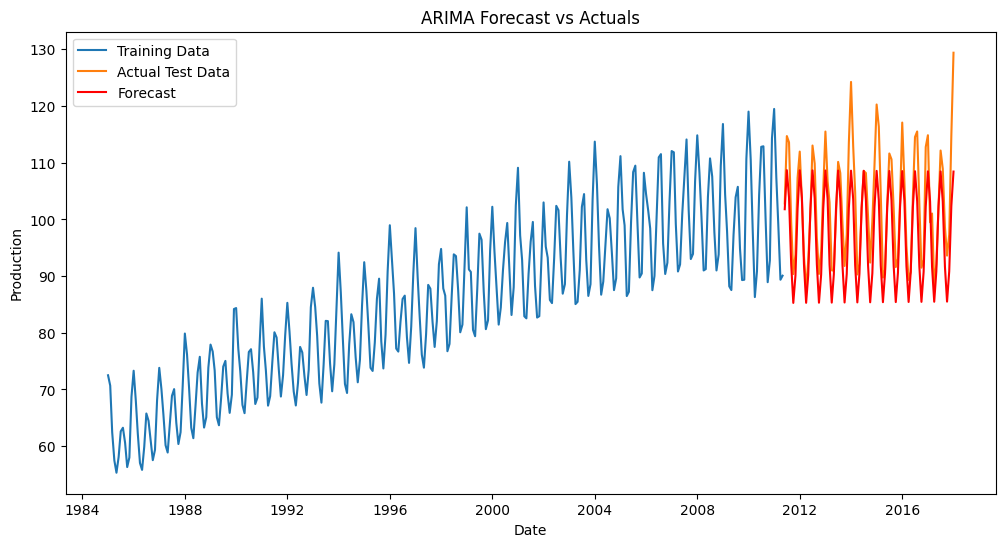

Root Mean Squared Error (RMSE): 7.03


In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Step 2: Load dataset
df = pd.read_csv('/content/Electric_Production.csv')
df.columns = ['Date', 'Production']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 3: Plot original data
plt.figure(figsize=(12, 6))
plt.plot(df['Production'], label='Electric Production')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()

# Step 4: Train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df['Production'][:train_size], df['Production'][train_size:]

# Step 5: Fit ARIMA model
# ARIMA(p,d,q) -> p=AR lags, d=differencing, q=MA lags
model = ARIMA(train, order=(2, 1, 2))  # You can experiment with (p,d,q)
model_fit = model.fit()

# Step 6: Forecast
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Step 7: Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()

# Step 8: Evaluation
rmse = sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
